In [4]:
from lafomo.plot import plot_spatiotemporal_data, tight_kwargs
from lafomo.datasets import (
    ReactionDiffusion, ReactionDiffusionGenerator,
    HomogeneousReactionDiffusion, DrosophilaSpatialTranscriptomics,
    ToyTranscriptomicGenerator, ToyTranscriptomics, P53Data
)
from lafomo.utilities.data import generate_neural_dataset_1d
import torch
from matplotlib import pyplot as plt

f torch.Size([70, 1, 332])
torch.Size([1, 1, 12])


C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  basal = torch.tensor(ref.basal, dtype=self.dtype)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:108: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decay = torch.tensor(ref.decay, dtype=self.dtype)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:109: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sensitivity = torch.tensor(ref.sensitivity, dtype=self.dtype)


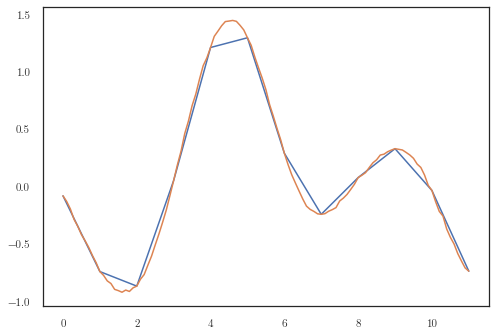

In [24]:
dataset = ToyTranscriptomicGenerator(
    num_outputs=5,
    num_latents=1,
    num_times=12,
    softplus=False,
    dtype=torch.float32)
dataset.generate_single(lengthscale=1.5)
print(dataset.f_observed.shape)
plt.plot(dataset.t_observed, dataset.f_observed.squeeze().detach())
plt.plot(dataset.t_observed_highres, dataset.f_observed_highres.squeeze().detach())

In [19]:
import numpy as np
maes = np.load('../../../experiments/maes.npy')
print(maes.shape)
maes = maes[1:]
print(maes.mean(0))
mus = maes.mean(0)
stds = maes.std(0)
print([f"{mu:.03f} \pm {std:.03f}" for mu, std in zip(mus, stds)])
print(maes.std(0))
print(maes)

(15, 6)
[0.15821093 0.05210679 0.19968136 0.26035429 0.5830054  0.66785366]
['0.158 \\pm 0.058', '0.052 \\pm 0.035', '0.200 \\pm 0.100', '0.260 \\pm 0.132', '0.583 \\pm 0.172', '0.668 \\pm 0.182']
[0.05789026 0.03517754 0.10038767 0.13196754 0.17225517 0.18170384]
[[0.1149076  0.01546973 0.12666768 0.1758813  0.61711943 0.67824971]
 [0.13628301 0.01160825 0.20197923 0.25544858 0.82941145 0.83927529]
 [0.20653257 0.08136799 0.16967931 0.55786228 0.50358206 0.48462736]
 [0.17190231 0.10657841 0.40656644 0.33371115 0.52411354 0.83591751]
 [0.08275982 0.02216986 0.11950984 0.09816709 0.29102519 0.31737133]
 [0.08892865 0.06215497 0.17202969 0.19365947 0.52479845 0.86023676]
 [0.22336492 0.06167827 0.41937149 0.46246567 0.79122055 0.86930474]
 [0.2616244  0.05082135 0.23997127 0.4385879  0.83940428 0.76600134]
 [0.24049665 0.02485169 0.1090055  0.19340594 0.62946922 0.57290861]
 [0.12833148 0.08212876 0.13671598 0.23718819 0.45448065 0.69324223]
 [0.10685237 0.12708694 0.28032845 0.1938705 

13641527
params torch.Size([1, 5])
torch.Size([8, 64, 3])
0.0 1.0
8 64
tensor([ 1.8658, -1.5222,  1.2546,  2.1713,  0.3376]) tensor([-1., -1., -1., -1., -1.])


C:\Users\Jacob\Documents\proj\lafomo\lafomo\utilities\data.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  grid = torch.tensor(grid.reshape(1, s1, s2, 2), dtype=torch.float)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\utilities\data.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data.reshape(data.shape[0], s1, s2, 4), dtype=torch.float)


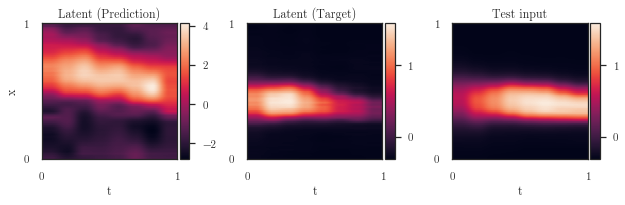

In [3]:
from lafomo.models import NeuralOperator
from lafomo.datasets import DrosophilaSpatialTranscriptomics
from torch.utils.data import DataLoader


block_dim = 2
learning_rate = 1e-3

modes = 8
width = 32
in_channels = 3

state_dict = torch.load('../nn/saved_model1205.pt')
model = NeuralOperator(block_dim, in_channels, 2, modes, width, num_layers=4)
print(model.count_params())
model.load_state_dict(state_dict)
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)
# trainer = NeuralOperatorTrainer(model, [optimizer], train_loader, test_loader)

def show_result(model, loader):
    x, y, params = next(iter(loader))
    out, params_out = model(x)

    num_t = x.shape[1]
    num_x = x.shape[2]

    t0 = x[..., 1].min().numpy()
    t1 = x[..., 1].max().numpy()
    print(t0, t1)
    x0 = x[..., 2].min().numpy()
    x1 = x[..., 2].max().numpy()

    extent = [t0, t1, x0, x1]

    print(num_t, num_x)
    plot_spatiotemporal_data(
        [
            out[0, ..., 0].detach().view(num_t, num_x).t(),
            y[0, ..., 0].view(num_t, num_x).t(),
            x[0, ..., 0].view(num_t, num_x).t()
        ],
        extent, nrows=1, ncols=3,
        titles=['Latent (Prediction)', 'Latent (Target)', 'Test input']
    )
    out = out.squeeze()
    y_target = y.squeeze()
    print(params_out[0].detach(), params[0])
    # print(F.mse_loss(out[...,0], y_target))

dataset = DrosophilaSpatialTranscriptomics(gene='kr', data_dir='../../../data', scale=True, scale_tx=True, nn_format=True)

print(dataset.train_data[0][0].shape)
dros_loader = DataLoader(dataset.train_data)

show_result(model, dros_loader)


In [3]:
gen = ToyTranscriptomicGenerator(
    num_outputs=5,
    num_latents=1,
    softplus=False,
    num_times=12)
gen.generate(2000, 10, './')

  0%|          | 0/2010 [00:00<?, ?it/s]C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:112: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  basal = torch.tensor(ref.basal, dtype=self.dtype)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:113: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  decay = torch.tensor(ref.decay, dtype=self.dtype)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\datasets\toy.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sensitivity = torch.tensor(ref.sensitivity, dtype=self.dtype)
100%|████

torch.Size([2010, 3, 5, 1])


tensor(25)
2000


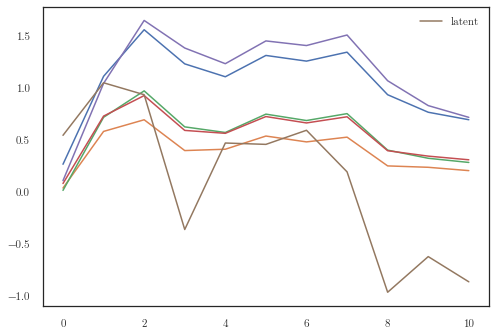

In [31]:
dataset = ToyTranscriptomics(data_dir='./')
i = torch.randint(0, 100, torch.Size([1]))[0]
print(i)
train = dataset.train_data[i]
print(len(dataset.train_data))

for i in range(gen.num_outputs):
    plt.plot(train[0][..., 1+i])
plt.plot(train[1][..., 0], label='latent')
plt.legend()

params torch.Size([1050, 4])
x
torch.Size([41, 41, 3])


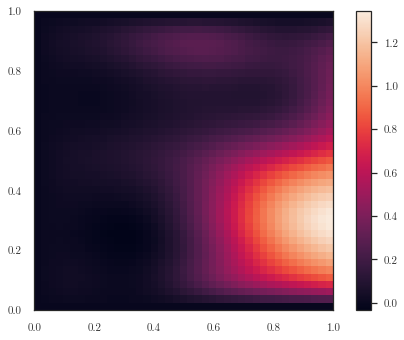

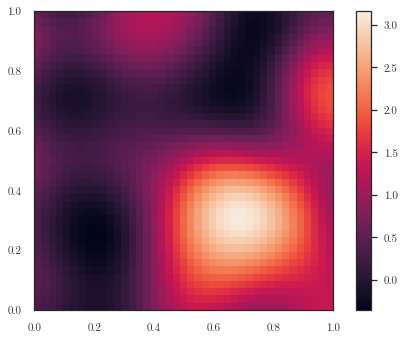

In [5]:
dataset = HomogeneousReactionDiffusion('../../../data', one_fixed_sample=False, nn_format=True, ntest=0)
# dataset = HomogeneousReactionDiffusion('../../../data', nn_format=False)


plt.figure()
d = dataset.train_data[0][0][:, :, 0]
i = 2
tx = dataset.data[0][0]
ts = tx[:, :, 1].unique().sort()[0].numpy()
xs = tx[:, :, 2].unique().sort()[0].numpy()
extent = [ts[0], ts[-1], xs[0], xs[-1]]

print('x')
print(dataset.train_data[0][0].shape)
x = dataset.train_data[i][0]
y = dataset.train_data[i][1]
plt.imshow(x[..., 0].t(), origin='lower', extent=extent)
plt.colorbar()
plt.figure()
plt.imshow(y[..., 0].t(), origin='lower', extent=extent)
plt.colorbar()
# plt.imshow(d.t(), origin='lower', extent=extent)

torch.Size([1681, 2])
tensor([   0,    1,    2,  ..., 1678, 1679, 1680])
params torch.Size([2000, 4])
shape torch.Size([41, 41, 3])
tensor([0.3000, 0.4000, 0.3500, 0.0010])


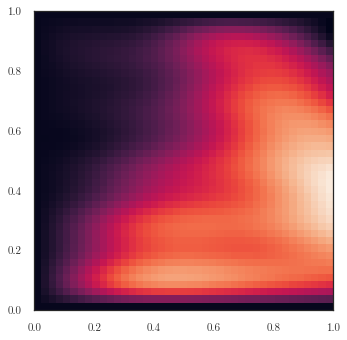

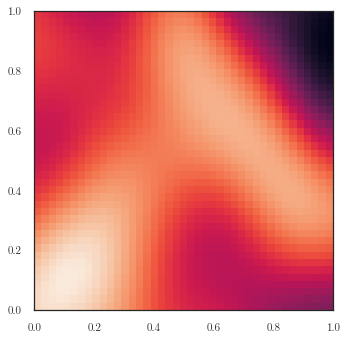

In [18]:
import numpy as np
data = ReactionDiffusion(data_dir='../../../data', nn_format=True)
i = np.random.randint(0, 100, 1)[0]
# i = 70

print('shape', data[i][0].shape)
print(data[i][2])
plt.imshow(data[i][0][..., 0].view(41, 41).t(), origin='lower', extent=extent)
plt.figure()
plt.imshow(data[i][1][..., 0].view(41, 41).t(), origin='lower', extent=extent)

13641326
params torch.Size([1, 4])
torch.Size([8, 64, 3])
0.0 1.0
8 64
tensor([  2.0080,   0.9432,  30.6544, -46.3498]) tensor([-1., -1., -1., -1.])


C:\Users\Jacob\Documents\proj\lafomo\lafomo\utilities\data.py:44: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  grid = torch.tensor(grid.reshape(1, s1, s2, 2), dtype=torch.float)
C:\Users\Jacob\Documents\proj\lafomo\lafomo\utilities\data.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data.reshape(data.shape[0], s1, s2, 4), dtype=torch.float)


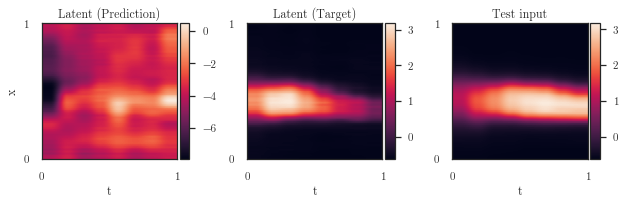

In [2]:
toydata1 = torch.load('../../../data/intermediate_toydata1_tomerge.pt')
toydata0 = torch.load('../../../data/intermediate_toydata0_tomerge.pt')

In [12]:
print(len(toydata0))
print(len(toydata1))
print(toydata1[0])

toydata = list()
for data in toydata0:
    toydata.append({**data, 'sensitivity': 1.0})


toydata.extend(toydata1)
print(len(toydata))
torch.save(toydata, '../../../data/intermediate_toydata.pt')

294
1050
{'samples': tensor([[ 0.0000,  0.0000,  0.0000,  ...,  0.7967,  0.6844,  0.4588],
        [ 0.0000,  0.0000,  0.0000,  ..., -0.0570, -0.3565, -0.5160],
        [ 0.0000,  0.0000,  0.0000,  ...,  1.7302,  1.2690,  0.4195],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ..., -1.1586, -0.7418, -0.4727],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.7132,  1.1986,  1.5983],
        [ 0.0000,  0.0000,  0.0000,  ..., -1.2674, -0.3059,  0.6457]]), 'l1': 0.1, 'l2': 0.1, 'sensitivity': 0.5, 'diffusion': 0.001, 'decay': 0.01}
1344


In [2]:
ReactionDiffusionGenerator().save_dataset(data_dir='../../../data')


In [26]:
gen = ReactionDiffusionGenerator()
dataset = HomogeneousReactionDiffusion('../../../data', one_fixed_sample=False, nn_format=False, ntest=0)
# dataset = HomogeneousReactionDiffusion('../../../data', nn_format=False)
tx = dataset[0][0]

In [31]:
print(tx.shape)
gen.kyy(tx.t(), tx.t()).shape

torch.Size([2, 1681])


torch.Size([1681, 1681])